# Netflix Movies and TV Shows

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. 

The main purpose of this project is to analyze and see the comparison between the total number of movies and shows and which one is the majority.

### What I am aiming to in this project is to predict what will Netflix focus on movies or tv shows in the future by using the classification model 

# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load dataset

In [2]:
netflix_df = pd.read_csv('netflix.csv')


In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Explore data analysis

In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### How many rows and columns in this dataset

In [5]:
netflix_df.shape

(8807, 12)

#### Check how many null values in our dataset

In [6]:
netflix_df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### we can see that some of the columns has null vallues 

# Cleaning


In [9]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### now I'll delet some columns that i will not use it and fill null value in column country and date added 

In [10]:
netflix_df.drop(['director', 'cast' , 'description', 'listed_in'] , axis=1 , inplace=True)
netflix_df['country'].fillna('Country Unavailable', inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

#### since the values in date added column are object i'll change it into Int and change the date format 

In [11]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['year_added'].astype(int);
netflix_df['day_added'].astype(int);

In [12]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,25,2021,9
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,24,2021,9
2,s3,TV Show,Ganglands,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,24,2021,9
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,24,2021,9


In [13]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
day_added       0
year_added      0
month_added     0
dtype: int64

### Now the dataset is clean 

# Visualization


#### Which calss is the most Movie / Tv Show 

C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Count')

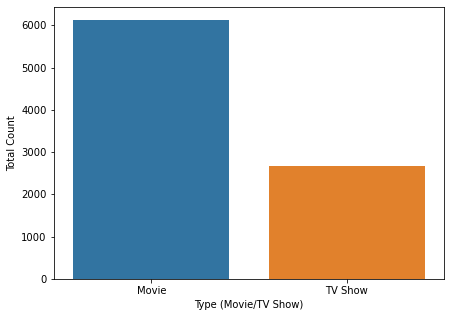

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(netflix_df.type);
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")

#### Ratings for Movies & TV Shows

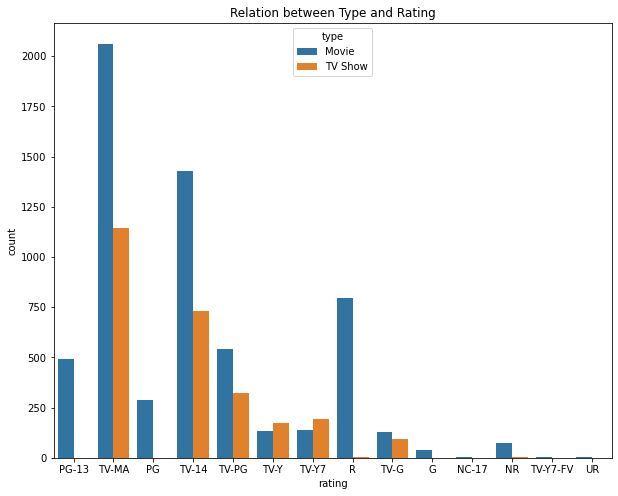

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df)
plt.title('Relation between Type and Rating')
plt.show()

#### Creat Rating descrption 

In [16]:
Rating_dic = {
    'TV-Y': 'Intended for children ages 2 to 6 and is not designed or expected to frighten.' , 
    'TV-Y7': 'Intended for children ages 7 and older. Best suited for children who know the difference between real life and make-believe. Contains mild fantasy or comedic violence. Some content could frighten younger children (under age 7).' ,
    'TV-Y7 FV': 'Intended for older children. Contains fantasy violence more combative than TVY7 programs.' ,
    'TV-G': 'Intended for all ages. Contains little or no violence, no strong language and little or no sexual dialogue or situations.' ,
    'TV-PG': 'Intended for younger children in the company of an adult. Possibly contains some suggestive dialogue, infrequent coarse language, some sexual situations or some moderate violence.' ,
    'TV-14': 'Intended for children ages 14 and older in the company of an adult. Possibly contains intensely suggestive dialogue, strong coarse language, intense sexual situations or intense violence.',
    'TV-MA:': 'Intended for adults and may be unsuitable for children under 17. Possibly contains crude indecent language, explicit sexual activity or graphic violence.' ,
    'G': 'This program is designed to be appropriate for all ages. This rating indicates a film contains nothing that would offend parents for viewing by children.' ,
    'PG': 'Parents are urged to give parental guidance. This film may contain some material parents might not like for their young children.',
    'PG-13': 'Some material may not be suited for children under age 13. May contain violence, nudity, sensuality, language, adult activities or other elements beyond a PG rating, but doesn’t reach the restricted R category',
    'R': 'This rating is for films specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.',
    'NC-17': 'This rating is applied to films the MPAA believes most parents will consider inappropriate for children 17 and under. It indicates only that adult content is more intense than in an R rated movie.'
}


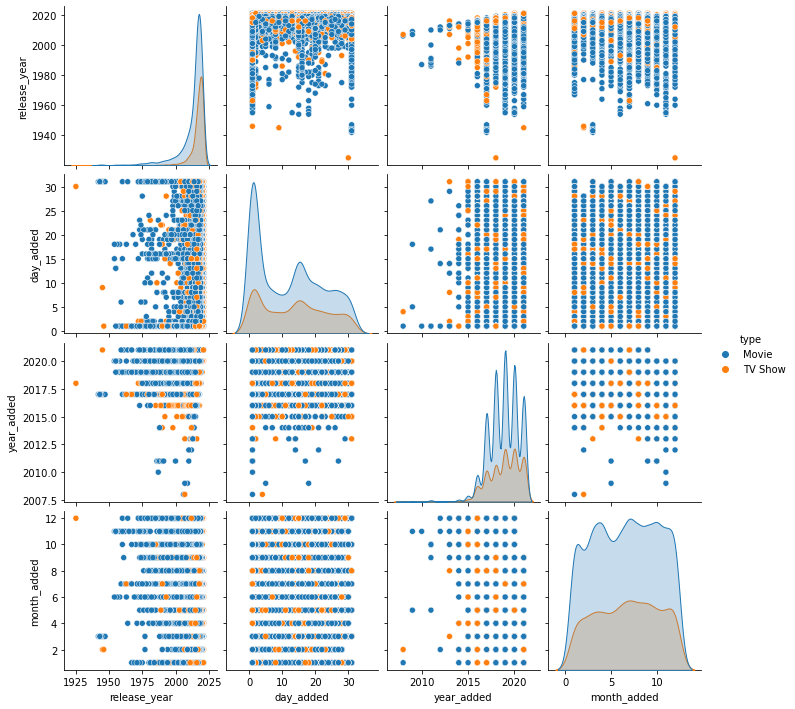

In [17]:
sns.pairplot(netflix_df, kind='scatter',hue='type')

#### As we see above netflix is focusing on Movies than Tv Show 

# preprocessing for modeling


In [18]:
netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,25,2021,9
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,24,2021,9
2,s3,TV Show,Ganglands,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,24,2021,9
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,24,2021,9


In [19]:
netflix_df.drop(columns=['title','show_id','duration','country'], inplace=True)


In [20]:
netflix_df.head()

,type,date_added,release_year,rating,day_added,year_added,month_added
0,Movie,2021-09-25,2020,PG-13,25,2021,9
1,TV Show,2021-09-24,2021,TV-MA,24,2021,9
2,TV Show,2021-09-24,2021,TV-MA,24,2021,9
3,TV Show,2021-09-24,2021,TV-MA,24,2021,9
4,TV Show,2021-09-24,2021,TV-MA,24,2021,9


In [21]:
netflix_df = pd.get_dummies(netflix_df)

In [22]:
netflix_df.rename(columns={"type_TV Show":"type_TV_Show"}, inplace= True)

In [23]:
netflix_df.columns

Index(['date_added', 'release_year', 'day_added', 'year_added', 'month_added',
       'type_Movie', 'type_TV_Show', 'rating_G', 'rating_NC-17', 'rating_NR',
       'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR'],
      dtype='object')

# split Data

#### Detect Input and Output

In [24]:
x = netflix_df.drop(['type_TV_Show' , 'type_Movie'], axis = 1)
x

,date_added,release_year,day_added,year_added,month_added,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,2021-09-25,2020,25,2021,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2021-09-24,2021,24,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2021-09-24,2021,24,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2021-09-24,2021,24,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2021-09-24,2021,24,2021,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,2019-11-20,2007,20,2019,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8803,2019-07-01,2018,1,2019,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8804,2019-11-01,2009,1,2019,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8805,2020-01-11,2006,11,2020,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
y = netflix_df.type_Movie
z = netflix_df.type_TV_Show

In [26]:
x = x.drop(['date_added'] , axis = 1) # Drop date added column 

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   release_year     8790 non-null   int64
 1   day_added        8790 non-null   int64
 2   year_added       8790 non-null   int64
 3   month_added      8790 non-null   int64
 4   rating_G         8790 non-null   uint8
 5   rating_NC-17     8790 non-null   uint8
 6   rating_NR        8790 non-null   uint8
 7   rating_PG        8790 non-null   uint8
 8   rating_PG-13     8790 non-null   uint8
 9   rating_R         8790 non-null   uint8
 10  rating_TV-14     8790 non-null   uint8
 11  rating_TV-G      8790 non-null   uint8
 12  rating_TV-MA     8790 non-null   uint8
 13  rating_TV-PG     8790 non-null   uint8
 14  rating_TV-Y      8790 non-null   uint8
 15  rating_TV-Y7     8790 non-null   uint8
 16  rating_TV-Y7-FV  8790 non-null   uint8
 17  rating_UR        8790 non-null   uint8
dtypes: int64

# Train test split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,z_train,z_test = train_test_split(x,y,z, test_size=0.20, random_state=80)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(z_train.shape)
print(z_test.shape)


(7032, 18)
(1758, 18)
(7032,)
(1758,)
(7032,)
(1758,)


In [30]:
x_train

,release_year,day_added,year_added,month_added,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
8148,1993,28,2019,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0
212,2016,27,2021,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2134,2020,14,2020,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0
242,2021,20,2021,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7873,2011,1,2017,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,2015,23,2017,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2259,2018,8,2020,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2982,2020,29,2020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5308,2016,1,2017,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
x_test_scaled

array([[-0.24433214,  0.75108618, -0.55607027, ..., -0.19633325,
        -0.02667473,  0.        ],
       [ 0.32136771,  1.6613298 , -0.55607027, ..., -0.19633325,
        -0.02667473,  0.        ],
       [ 0.54764766, -1.06940105,  1.34921775, ..., -0.19633325,
        -0.02667473,  0.        ],
       ...,
       [-1.26259187,  0.24539528,  0.07902574, ..., -0.19633325,
        -0.02667473,  0.        ],
       [ 0.32136771,  1.1556389 , -0.55607027, ..., -0.19633325,
        -0.02667473,  0.        ],
       [-0.24433214,  0.24539528, -1.82626228, ..., -0.19633325,
        -0.02667473,  0.        ]])

In [33]:
x_train_scaled

array([[-2.39399158,  1.56019162,  0.07902574, ..., -0.19633325,
        -0.02667473,  0.        ],
       [ 0.20822774,  1.45905344,  1.34921775, ..., -0.19633325,
        -0.02667473,  0.        ],
       [ 0.66078763,  0.1442571 ,  0.71412175, ..., -0.19633325,
        -0.02667473,  0.        ],
       ...,
       [ 0.66078763,  1.6613298 ,  0.71412175, ..., -0.19633325,
        -0.02667473,  0.        ],
       [ 0.20822774, -1.17053923, -1.19116627, ..., -0.19633325,
        -0.02667473,  0.        ],
       [-0.24433214,  0.34653346,  1.34921775, ..., -0.19633325,
        -0.02667473,  0.        ]])

# Modeling

#### I'll try 4 diffrent type 

## Apply logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train, z_train)


LogisticRegression()

In [35]:
y_pred = lr.predict(x_test_scaled)
z_pred = lr.predict(x_test_scaled)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [37]:
z_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [38]:
print(y_test)

4280    1
7211    1
1106    1
8433    1
5449    1
       ..
5069    0
5843    0
3914    1
6678    0
8800    0
Name: type_Movie, Length: 1758, dtype: uint8


In [39]:
z_test

4280    0
7211    0
1106    0
8433    0
5449    0
       ..
5069    1
5843    1
3914    0
6678    1
8800    1
Name: type_TV_Show, Length: 1758, dtype: uint8

### Model evaluation for logistic regression

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))
print(classification_report( z_pred, z_test))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47      1758
           1       0.00      0.00      0.00         0

    accuracy                           0.31      1758
   macro avg       0.50      0.16      0.24      1758
weighted avg       1.00      0.31      0.47      1758

              precision    recall  f1-score   support

           0       1.00      0.69      0.82      1758
           1       0.00      0.00      0.00         0

    accuracy                           0.69      1758
   macro avg       0.50      0.34      0.41      1758
weighted avg       1.00      0.69      0.82      1758



C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-p

In [51]:
lr.score(x_train_scaled,y_train,z_train)

1.0

In [57]:
lr.score(x_test_scaled,y_test,z_test)

1.0

## Apply Random Forst

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train_scaled,y_train,z_train)

RandomForestClassifier()

In [43]:
y_pred_rf= rf.predict(x_test_scaled)
z_pred_rf= rf.predict(x_test_scaled)

### Model evaluation for Random Forst

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_rf,y_test))
print(classification_report( z_pred_rf, z_test))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47      1758
           1       0.00      0.00      0.00         0

    accuracy                           0.31      1758
   macro avg       0.50      0.16      0.24      1758
weighted avg       1.00      0.31      0.47      1758

              precision    recall  f1-score   support

           0       1.00      0.69      0.82      1758
           1       0.00      0.00      0.00         0

    accuracy                           0.69      1758
   macro avg       0.50      0.34      0.41      1758
weighted avg       1.00      0.69      0.82      1758



C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-p

In [52]:
lr.score(x_train_scaled,y_train,z_train)

1.0

In [58]:
lr.score(x_test_scaled,y_test,z_test)

1.0

## Apply KNN 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,z_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred_knn = knn.predict(x_test_scaled)
z_pred_knn = knn.predict(x_test_scaled)

### Model evaluation for KNN

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_knn,y_test))
print(classification_report(z_pred_knn,z_test))

              precision    recall  f1-score   support

           0       0.74      0.27      0.40      1481
           1       0.11      0.48      0.18       277

    accuracy                           0.30      1758
   macro avg       0.42      0.38      0.29      1758
weighted avg       0.64      0.30      0.36      1758

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1481
           1       0.26      0.52      0.35       277

    accuracy                           0.70      1758
   macro avg       0.58      0.62      0.58      1758
weighted avg       0.79      0.70      0.73      1758



In [53]:
lr.score(x_train_scaled,y_train,z_train)

1.0

In [59]:
lr.score(x_test_scaled,y_test,z_test)

1.0

## Try Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train,z_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = dtree.predict(x_test_scaled)
z_pred_dt = dtree.predict(x_test_scaled)

### Model evaluation for Decision Tree

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_dt,y_test))
print(classification_report(z_pred_dt,z_test))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47      1758
           1       0.00      0.00      0.00         0

    accuracy                           0.31      1758
   macro avg       0.50      0.16      0.24      1758
weighted avg       1.00      0.31      0.47      1758

              precision    recall  f1-score   support

           0       1.00      0.69      0.82      1758
           1       0.00      0.00      0.00         0

    accuracy                           0.69      1758
   macro avg       0.50      0.34      0.41      1758
weighted avg       1.00      0.69      0.82      1758



C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadiyah.alotaibi\Anaconda3\lib\site-p

In [54]:
lr.score(x_train_scaled,y_train,z_train)

1.0

In [60]:
lr.score(x_test_scaled,y_test,z_test)

1.0

# END